In [2]:
# Brownian Motion Basic Example
# https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html

from scipy.stats import norm

# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0

# Number of iterations to compute.
n = 20

# Iterate to compute the steps of the Brownian motion.
for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print(x)


0.0018950224851448398
0.0015175803806148141
0.0010611182531490202
0.00867001362146594
0.004163193997145996
-0.0012270766849729721
0.008384146838612633
0.009488115231752527
0.00509092666161885
0.011415387783299563
0.008887993900179332
-0.0016505626634826555
-0.018148749590388275
-0.014048578153264879
-0.011494300685916798
-0.00940475748539234
-0.011791331992977532
-0.008026593871573355
-0.01070330320197919
-0.016132281937600773


In [3]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

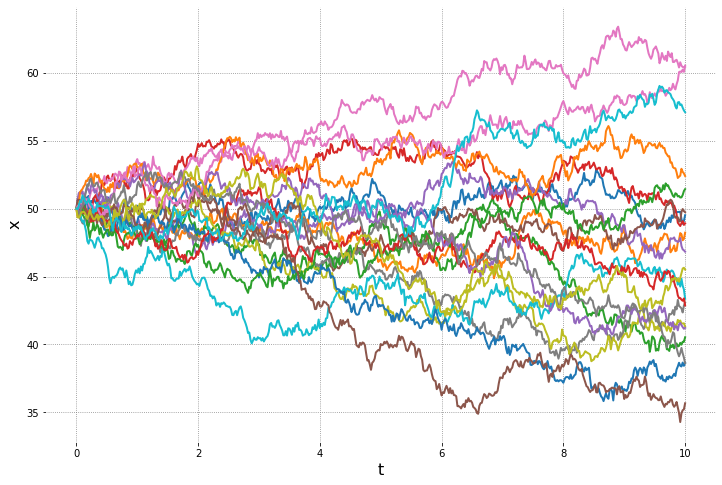

In [37]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel
import matplotlib.pyplot as plt
%matplotlib inline

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# rcParams must be called before the plt.subplots() or else it will not refresh
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rc('grid', linestyle='dotted', color='gray')
plt.rc('lines', linewidth=2, color='r')
fig, ax = plt.subplots(figsize=(12,8))

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    ax.plot(t, x[k])
ax.set_xlabel('t', fontsize=16)
ax.set_ylabel('x', fontsize=16)
plt.grid(True)
plt.show()

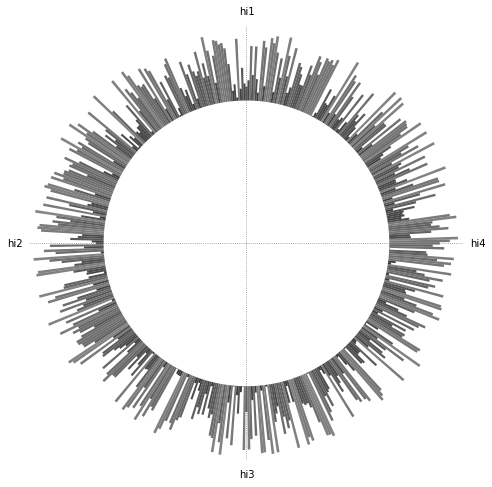

In [39]:
# Here is a plot potentially can use for circular bar chart (Westworld theme)
import numpy as np
import matplotlib.pyplot as plt

N = 500
bottom = 8
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

fig, ax = plt.subplots(figsize=(12,8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
# cmaps['Miscellaneous'] = ['jet', 'gray', 'GnBu', gist_gray', flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern','gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg','gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.gist_gray(r / 10.))
    bar.set_alpha(0.8)

# set tick locations
# ax.set_xticks(theta)
ax.set_xticks([0.5 * np.pi, np.pi, 1.5*np.pi, 2 * np.pi])

# set tick labels
# ax.set_xticklabels(radii)
ax.set_xticklabels(['hi1','hi2','hi3','hi4'])

# turn off y ticks
ax.set_yticks([], [])

plt.show()